# Diminutive Suffix Productivity: statistics and analysis
Juan Berrios | jeb358@pitt.edu | Last updated: April 17, 2020

**Summary and overview:**

- This notebook is a continuation of the [cleaning and exploratory analysis notebook](https://github.com/Data-Science-for-Linguists-2020/Diminutive-Suffix-Productivity/blob/master/code/cleaning_analysis.ipynb) in my repository. The purpose is to use the master data frame previously created to extract statistical measures of productivity (in general and by variety). 

**Contents:**
1. [Preparation](#1.-Preparation): includes the necessary preparations and loading of the files.
2. [Statistical measures of productivity](#2.-Statistical-measures-of-productivity): includes code for extracting relevant statistics measures of productivity. A summary paragraph is included at the end of this section.
3. [Plotting](#3.-Plotting): a follow up of the previous step to visualize differences between suffixes and between countries. 
4. [Storing files](#4.-Storing-files): includes code for storing the results as pickled files.

## 1. Preparation

- Loading libraries and additional settings:

In [1]:
#Importing libraries
import pickle, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Turning pretty print off:
%pprint

# Settings for plotting
matplotlib.rcParams['font.sans-serif'] = "Century Gothic"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['axes.labelsize'] = 14

#Releasing all output:                                            
from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


- Loading pickle files:

In [2]:
#Master DF

master_DF = pd.read_pickle('pkl/master_DF.pkl')

#Hapax legomena sets (for all morphological categories)

ar_hapax = pd.read_pickle('pkl/ar_hapax.pkl')
bo_hapax = pd.read_pickle('pkl/bo_hapax.pkl')
cl_hapax = pd.read_pickle('pkl/cl_hapax.pkl')
co_hapax = pd.read_pickle('pkl/co_hapax.pkl')
cr_hapax = pd.read_pickle('pkl/cr_hapax.pkl')
cu_hapax = pd.read_pickle('pkl/cu_hapax.pkl')
do_hapax = pd.read_pickle('pkl/do_hapax.pkl')
ec_hapax = pd.read_pickle('pkl/ec_hapax.pkl')
es_hapax = pd.read_pickle('pkl/es_hapax.pkl')
gt_hapax = pd.read_pickle('pkl/gt_hapax.pkl')
hn_hapax = pd.read_pickle('pkl/hn_hapax.pkl')
mx_hapax = pd.read_pickle('pkl/mx_hapax.pkl')
ni_hapax = pd.read_pickle('pkl/ni_hapax.pkl')
pa_hapax = pd.read_pickle('pkl/pa_hapax.pkl')
pe_hapax = pd.read_pickle('pkl/pe_hapax.pkl')
pr_hapax = pd.read_pickle('pkl/pr_hapax.pkl')
py_hapax = pd.read_pickle('pkl/py_hapax.pkl')
sv_hapax = pd.read_pickle('pkl/sv_hapax.pkl')
us_hapax = pd.read_pickle('pkl/us_hapax.pkl')
uy_hapax = pd.read_pickle('pkl/uy_hapax.pkl')

- A set of hapax legomena for the full dataset:

In [3]:
master_hapax = set()

hapax_list = [ar_hapax, bo_hapax, cl_hapax, co_hapax, cr_hapax, cu_hapax, do_hapax, ec_hapax, es_hapax, 
              gt_hapax, hn_hapax, mx_hapax, ni_hapax, pa_hapax, pe_hapax, pr_hapax, py_hapax, sv_hapax, 
              us_hapax, uy_hapax]

for hapax_set in hapax_list:
    for w in hapax_set:
        master_hapax.add(w)

In [4]:
len(master_hapax) #Good to go.

5339643

## 2. Statistical measures of productivity

- Some definitions are in order before I proceed. A number of measures of morphological productivity have been offered in the literature, but they don't always measure the same thing. In this project I focus on three statistical measurements of productivity [(Baayen, 2009)](https://www.degruyter.com/view/book/9783110213881/10.1515/9783110213881.2.899.xml):
    1. Realized productivity: the size of the morphological category, as measured by the type count of the members of a morphological category in a corpus with N tokens.
    2. Expanding productivity: the rate at which a category is attracting new members, as measured by the number of words in a morphological category that occur only once in a corpus of N tokens; the hapax legomena.
    3. Potential productivity: the number of occasionalisms. A category that can produce a higher number of occasionalisms is thought to be productive. This is measured by the number of hapax legomena exhibiting a pattern divided by the total number of tokens exhibiting the same pattern. Also known as the category-conditioned degree of productivity or Baayen's *P*. A drawback of this measure is that it is sensitive to corpus size, which is why an alternative, the hapax-conditioned degree of productivity or *P**, is also used.  This is measured by the number of hapax legomena exhibiting a pattern divided by the total number of hapax legomena (exhibiting any pattern) in the corpus.

- Let's first take a look at general descriptive statistics for the the whole data set:

In [5]:
master_DF_stats = master_DF.describe()
master_DF_stats 

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
count,1429012,1429012,1429012,1429012,1429012,1429012,1429012,1429012,1429012,1429012
unique,461812,1429012,49526,62073,11,20,2,3,3,2
top,969008,1524629503,poquito,poquito,n,ES,Noun,unknown,unknown,-ito
freq,2722,1,59520,54543,822553,383969,1170533,1035299,1035299,1195810


- It is possible to get toke (count) and type (unique) counts this date frame using Pandas built-in functions:

In [6]:
master_DF_stats = master_DF.groupby('Diminutive').describe().T 

In [7]:
master_DF_stats.loc['Word'] #It is words that I am focused on.

Diminutive,-illo,-ito
count,233202,1195810
unique,13157,48930
top,cosillas,poquito
freq,3501,54543


In [8]:
master_DF_stats.loc['Word'].iloc[0:2] #Tokens row 1, types row 2.
                                      #Almost done. Only missing is a row for hapaxes and we can get to operations.  

Diminutive,-illo,-ito
count,233202,1195810
unique,13157,48930


- The next step is to filter out diminutive hapax legomena (this list, hence, differs from that created in cell 3 because the latter contains hapax legomena for all morphological cateogories):

In [9]:
hapax = master_DF.groupby('Word').filter(lambda x: len(x) == 1) 
hapax

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
32912,470,2198136862,semiescrito,semiescrita,j,AR,Adjective,unknown,unknown,-ito
119578,900,2337362927,uartito,uartito,j,AR,Adjective,unknown,unknown,-ito
331285,3350,49493302,mangueadita,mangueadita,n,AR,Noun,unknown,unknown,-ito
343760,3400,188880930,transeuntito,transeuntito,n,AR,Noun,unknown,unknown,-ito
343765,3400,188880935,sabiolita,sabiolita,n,AR,Noun,unknown,unknown,-ito
...,...,...,...,...,...,...,...,...,...,...
1479443,2389539,1857712333,iglesianecesita,iglesianecesita,n,UY,Noun,unknown,unknown,-ito
1518691,2389839,1937747188,prurito-rascado-prurito,prurito-rascado-prurito,n,UY,Noun,unknown,unknown,-ito
1693725,2391909,1958256192,http://www.redqualitas.com/inauguracion.\\,http://www.redqualitas.com/Inauguracion.\\,n,UY,Noun,unknown,unknown,-ito
1847147,2392909,1958257880,delcircuito,delcircuito,j,UY,Adjective,unknown,unknown,-ito


In [10]:
hapax['Diminutive'].value_counts() #Hapax by diminutive suffix.

-ito     26611
-illo     6513
Name: Diminutive, dtype: int64

- Using the above to build a summary data frame for analysis:

In [11]:
master_DF_stats = master_DF_stats.loc['Word'].iloc[0:2]
master_DF_stats.loc['hapax'] = hapax['Diminutive'].value_counts()
master_DF_stats.index

Index(['count', 'unique', 'hapax'], dtype='object')

In [12]:
master_DF_stats.rename(index={'count':'Tokens', 'unique':'Types','hapax':'Hapax'}, inplace=True) #Renaming columns.

In [13]:
master_DF_stats = master_DF_stats.T  #Voilà!
master_DF_stats

,Tokens,Types,Hapax
Diminutive,,,
-illo,233202,13157,6513
-ito,1195810,48930,26611


- Creating a function to do all the above by country:

In [14]:
def productivity_variety(master, variety):
    df = master[master['Variety'] == variety]
    hapax = df.groupby('Word').filter(lambda x: len(x) == 1) 
    hapax = hapax['Diminutive'].value_counts() 
    df = df.groupby('Diminutive').describe().T 
    df = df.loc['Word'].iloc[0:2]
    df.loc['hapax'] = hapax
    df.rename(index={'count':'Tokens', 'unique':'Types','hapax':'Hapax'}, inplace=True)
    return df.T

- Applying to every variety using the function created above (this is necessary given that a hapax might not be so in the subset corpus of a given variety):

In [15]:
ar_DF_stats = productivity_variety(master_DF, 'AR')
bo_DF_stats = productivity_variety(master_DF, 'BO')
cl_DF_stats = productivity_variety(master_DF, 'CL')
co_DF_stats = productivity_variety(master_DF, 'CO')
cr_DF_stats = productivity_variety(master_DF, 'CR')
cu_DF_stats = productivity_variety(master_DF, 'CU')
do_DF_stats = productivity_variety(master_DF, 'DO')
ec_DF_stats = productivity_variety(master_DF, 'EC')
es_DF_stats = productivity_variety(master_DF, 'ES')
gt_DF_stats = productivity_variety(master_DF, 'GT')
hn_DF_stats = productivity_variety(master_DF, 'HN')
mx_DF_stats = productivity_variety(master_DF, 'MX')
ni_DF_stats = productivity_variety(master_DF, 'NI')
pa_DF_stats = productivity_variety(master_DF, 'PA')
pe_DF_stats = productivity_variety(master_DF, 'PE')
pr_DF_stats = productivity_variety(master_DF, 'PR')
py_DF_stats = productivity_variety(master_DF, 'PY')
sv_DF_stats = productivity_variety(master_DF, 'SV')
us_DF_stats = productivity_variety(master_DF, 'US')
uy_DF_stats = productivity_variety(master_DF, 'UY')

- Statistical measurements of productivity:

In [16]:
#Category-conditioned (P)

def cat_productivity(df):
    df['P'] = (np.divide(df['Hapax'], df['Tokens'])*100)

#Hapax-conditioned (P*)

def hapax_productivity(df, hapaxset):
    df['P*'] = (np.divide(df['Hapax'], len(hapaxset))*100)

- Calculating the measures for the master data frame:

In [17]:
cat_productivity(master_DF_stats)
hapax_productivity(master_DF_stats,master_hapax)
master_DF_stats

,Tokens,Types,Hapax,P,P*
Diminutive,,,,,
-illo,233202,13157,6513,2.79286,0.121974
-ito,1195810,48930,26611,2.22535,0.498367


- By variety:

In [18]:
#Create a list of data frames, hapax sets, and a tuple of both, respectively, to streamline the process:

df_list = [ar_DF_stats, bo_DF_stats, cl_DF_stats, co_DF_stats, cr_DF_stats, cu_DF_stats, do_DF_stats, ec_DF_stats,
           es_DF_stats, gt_DF_stats, hn_DF_stats, mx_DF_stats, ni_DF_stats, pa_DF_stats, pe_DF_stats, pr_DF_stats, 
           py_DF_stats, sv_DF_stats, us_DF_stats, uy_DF_stats]

hapax_list = [ar_hapax, bo_hapax, cl_hapax, co_hapax, cr_hapax, cu_hapax, do_hapax, ec_hapax, es_hapax, gt_hapax, 
              hn_hapax, mx_hapax, ni_hapax, pa_hapax, pe_hapax, pr_hapax, py_hapax, sv_hapax, us_hapax, uy_hapax]

df_hapax_tups = list(map(lambda x, y:(x,y), df_list, hapax_list)) 

In [19]:
#P: Category-conditioned productivity

for df in df_list:
    cat_productivity(df)
    
#P*: Category-conditioned productivity

for (df,hapaxset) in df_hapax_tups:
    hapax_productivity(df, hapaxset)

- To work in one rather than several data frames at once for the by-variety analysis, let's create a single data frame including all varieties:

In [20]:
all_DF_stats = pd.concat(df_list, keys=['AR', 'BO', 'CL', 'CO', 'CR', 'CU', 'DO', 'EC', 'ES', 'GT', 'HN', 'MX', 'NI',
                                        'PA', 'PE', 'PR', 'PY', 'SV', 'US', 'UY'], names=['Variety'], sort=True)

all_DF_stats = all_DF_stats[['Tokens', 'Types', 'Hapax', 'P', 'P*']] #Reordering columns

all_DF_stats #All measures by variety together.

Tokens  Types Hapax        P         P*
Variety Diminutive                                         
AR      -illo        13581   1878   998   7.3485  0.0986598
        -ito        118699  10606  5230   4.4061   0.517025
BO      -illo         3743    972   484  12.9308   0.126268
        -ito         18552   3830  1939  10.4517   0.505854
CL      -illo         7743   1456   799   10.319   0.143556
        -ito         48373   6480  3273  6.76617   0.588057
CO      -illo        17115   2420  1215  7.09904   0.131766
        -ito         83159   9882  4957  5.96087   0.537583
CR      -illo         6429   1588   868  13.5013    0.24613
        -ito         21008   4226  2146  10.2152    0.60852
CU      -illo         6634   1149   492  7.41634   0.113938
        -ito         31760   4595  1920  6.04534   0.444638
DO      -illo         3700    941   481       13   0.131974
        -ito         19741   4061  2043   10.349   0.560548
EC      -illo         5866   1243   627  10.6887   0.132589
        -ito         30649   5346  2687  8.76701   0.568207
ES      -illo        81372   6846  3196  3.92764   0.165725
        -ito        302597  18402  9151  3.02415   0.474516
GT      -illo         5627   1148   600  10.6629   0.121166
        -ito         34867   5787  2831  8.11943   0.571703
HN      -illo         3478    961   495  14.2323    0.13826
        -ito         17201   3771  1906  11.0808   0.532371
MX      -illo        24762   3309  1677  6.77247   0.132842
        -ito        151024  13526  6834  4.52511   0.541351
NI      -illo         3603    922   467  12.9614    0.13523
        -ito         18268   3753  1836  10.0504   0.531655
PA      -illo         3146    840   440   13.986   0.141216
        -ito         14077   3511  1843  13.0923   0.591501
PE      -illo        11483   1989  1032   8.9872   0.131673
        -ito         84227   9255  4571    5.427   0.583213
PR      -illo         4082    866   415  10.1666   0.110207
        -ito         24383   4456  2197  9.01038   0.583432
PY      -illo         2531    693   371  14.6582   0.108378
        -ito         15562   3489  1786  11.4767   0.521733
SV      -illo         3972   1164   652  16.4149   0.161135
        -ito         24435   4994  2572  10.5259   0.635642
US      -illo        20737   3074  1557  7.50832   0.150044
        -ito        111597  11206  5608  5.02522   0.540426
UY      -illo         3598    821   416   11.562   0.103865
        -ito         25631   4492  2217  8.64968   0.553533

### Summary
- Overall: in terms of realized and expanding  productivity, the numbers show that </i>-ito</i> is the bigger category and that it is overall attracting more new members. The category-conditioned degree of productivity, however, doesn't appear to fully capture the difference between these two suffixes in terms of occasionalisms. This might be due to the fact that <i>-illo</i> has notoriously fewer tokens, so the comparison is not completely fair. Alternatively, the hapax-conditioned degree of productivity shows a far more noticeable difference. 
- By variety: the numbers by country follow the same trend as those of the master data frame. A few differences are worth noting though.  Whereas <i>P</i> above showed both suffixes in similar standing, the differences here are higher in favor <i>-illo</i>, particularly in countries such as Peru where it almost doubles <i>-ito</i>. For <i>P*</i>, however, <i>-ito</i> remains the prevailing suffix in all varieties, although differences vary by country and might worth looking at with inferential statistics.

## 3. Plotting

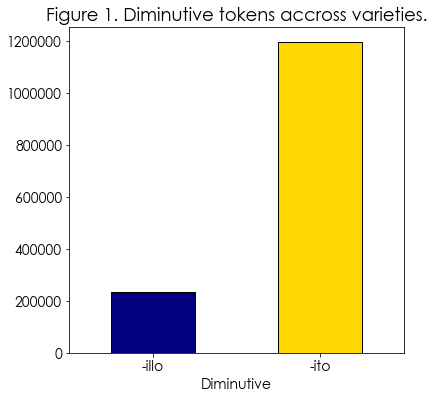

In [21]:
#Build plot

master_DF_stats['Tokens'].plot.bar(figsize=(6,6), color=['navy', 'gold'], edgecolor='black', fontsize=14,
                                    rot=0, title ='Figure 1. Diminutive tokens accross varieties.')

#Not saved as it's the same from prior notebook.

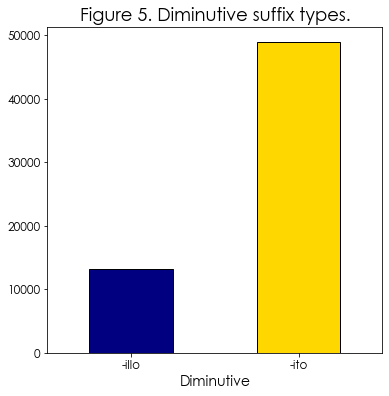

In [22]:
#Build plot

master_DF_stats['Types'].plot.bar(figsize=(6,6),color=['navy', 'gold'], edgecolor='black', fontsize=12,
                                   rot = 0, title ='Figure 5. Diminutive suffix types.')

#Show and save plot

plt.savefig('../figures/5_types_accross_varieties.png', dpi = 600)

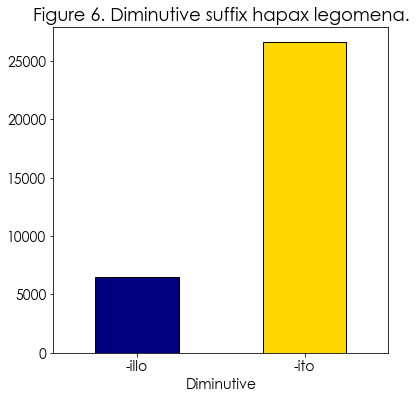

In [23]:
#Build plot

master_DF_stats['Hapax'].plot.bar(figsize=(6,6), color=['navy', 'gold'], edgecolor='black', fontsize=14,
                                  rot=0, title ='Figure 6. Diminutive suffix hapax legomena.')

#Show and save plot

plt.savefig('../figures/6_hapax_accross_varieties.png', dpi = 600)

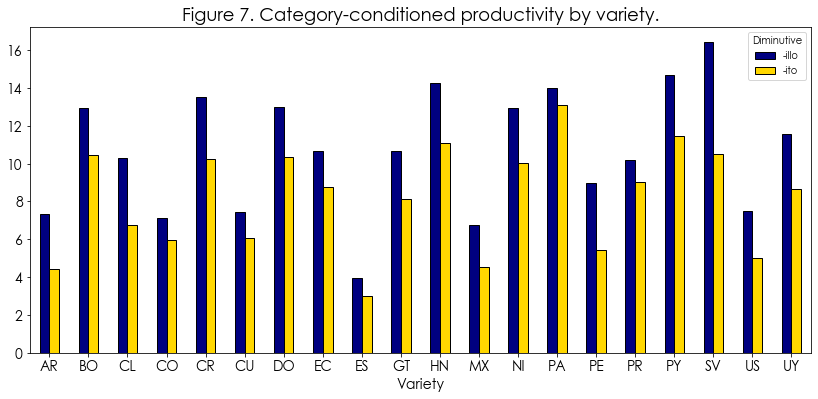

In [24]:
#Build plot

all_DF_stats['P'].unstack().plot.bar(figsize=(14,6), color=['navy', 'gold'], edgecolor='black', fontsize=14,
                                      rot=0, title ='Figure 7. Category-conditioned productivity by variety.')

#Show and save plot

plt.savefig('../figures/7_category_contioned_productivity.png', dpi = 600)

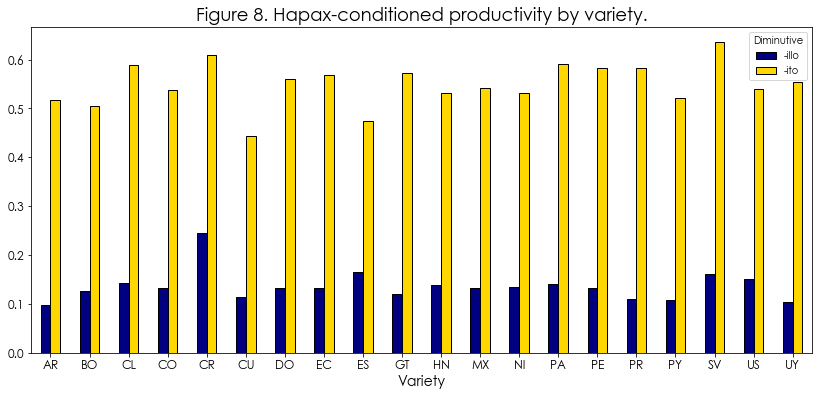

In [25]:
#Build plot

all_DF_stats['P*'].unstack().plot.bar(figsize=(14,6), color=['navy', 'gold'], edgecolor='black', fontsize=12,
                                      rot=0, title ='Figure 8. Hapax-conditioned productivity by variety.')

#Show and save plot

plt.savefig('../figures/8_hapax_contioned_productivity.png', dpi = 600)

## 4. Storing files

In [26]:
#Master hapax data frame

hapax.to_pickle('pkl/master_DF_hapax.pkl')

#Master hapax set

with open('pkl/master_hapax.pkl', 'wb') as f:
    pickle.dump(master_hapax, f, -1)

#Master stats

master_DF_stats.to_pickle('pkl/master_DF_stats.pkl')

#By-variety stats

all_DF_stats.to_pickle('pkl/all_DF_stats.pkl')